## Datasaurus Dozen
Datasaurus Dozen to zestaw danych stworzony przez Justin Matejka i George'a Fitzmaurice, który ilustruje dlaczego wizualizacja danych jest tak ważna.

## Czym jest Datasaurus Dozen?
To 13 różnych zestawów danych, które mają niemal identyczne statystyki opisowe (średnią, odchylenie standardowe, korelację), ale gdy je zwizualizujemy, wyglądają kompletnie inaczej! Jeden z nich tworzy kształt dinozaura, inne tworzą gwiazdę, okrąg, linie itp.

## Dlaczego to ważne?
Pokazuje, że samo patrzenie na statystyki może być mylące. Zawsze trzeba wizualizować dane!

In [1]:
# Import bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Ustawienia wizualizacji
plt.rcParams['figure.figsize'] = (15, 10)
sns.set_style("whitegrid")


In [3]:
from google.colab import files
files.upload()

Saving datasaurus.csv to datasaurus.csv


{'datasaurus.csv': b'\xef\xbb\xbfdataset,x,y\r\ndino,55.3846,97.1795\r\ndino,51.5385,96.0256\r\ndino,46.1538,94.4872\r\ndino,42.8205,91.4103\r\ndino,40.7692,88.3333\r\ndino,38.7179,84.8718\r\ndino,35.641,79.8718\r\ndino,33.0769,77.5641\r\ndino,28.9744,74.4872\r\ndino,26.1538,71.4103\r\ndino,23.0769,66.4103\r\ndino,22.3077,61.7949\r\ndino,22.3077,57.1795\r\ndino,23.3333,52.9487\r\ndino,25.8974,51.0256\r\ndino,29.4872,51.0256\r\ndino,32.8205,51.0256\r\ndino,35.3846,51.4103\r\ndino,40.2564,51.4103\r\ndino,44.1026,52.9487\r\ndino,46.6667,54.1026\r\ndino,50,55.2564\r\ndino,53.0769,55.641\r\ndino,56.6667,56.0256\r\ndino,59.2308,57.9487\r\ndino,61.2821,62.1795\r\ndino,61.5385,66.4103\r\ndino,61.7949,69.1026\r\ndino,57.4359,55.2564\r\ndino,54.8718,49.8718\r\ndino,52.5641,46.0256\r\ndino,48.2051,38.3333\r\ndino,49.4872,42.1795\r\ndino,51.0256,44.1026\r\ndino,45.3846,36.4103\r\ndino,42.8205,32.5641\r\ndino,38.7179,31.4103\r\ndino,35.1282,30.2564\r\ndino,32.5641,32.1795\r\ndino,30,36.7949\r\ndino

# CZĘŚĆ 1: Wczytywanie danych

In [4]:
print("Wczytywanie danych Datasaurus Dozen...")
datasaurus = pd.read_csv("datasaurus.csv", sep=',')
print(f"✓ Wczytano {len(datasaurus)} wierszy danych")
print(f"✓ Liczba różnych zestawów: {datasaurus['dataset'].nunique()}")
print("\nDostępne zestawy danych:")
print(datasaurus['dataset'].unique())


print("\nPierwsze wiersze danych:")
print(datasaurus.head(10))

Wczytywanie danych Datasaurus Dozen...
✓ Wczytano 1846 wierszy danych
✓ Liczba różnych zestawów: 13

Dostępne zestawy danych:
['dino' 'away' 'h_lines' 'v_lines' 'x_shape' 'star' 'high_lines' 'dots'
 'circle' 'bullseye' 'slant_up' 'slant_down' 'wide_lines']

Pierwsze wiersze danych:
  dataset        x        y
0    dino  55.3846  97.1795
1    dino  51.5385  96.0256
2    dino  46.1538  94.4872
3    dino  42.8205  91.4103
4    dino  40.7692  88.3333
5    dino  38.7179  84.8718
6    dino  35.6410  79.8718
7    dino  33.0769  77.5641
8    dino  28.9744  74.4872
9    dino  26.1538  71.4103


# CZĘŚĆ 2: Analiza statystyczna


In [5]:
# Obliczmy podstawowe statystyki dla każdego zestawu
stats_summary = datasaurus.groupby('dataset').agg({
    'x': ['mean', 'std'],
    'y': ['mean', 'std']
}).round(2)

# Obliczmy korelację dla każdego zestawu
correlations = datasaurus.groupby('dataset').apply(
    lambda group: np.corrcoef(group['x'], group['y'])[0, 1]
).round(2)

print("\nStatystyki dla każdego zestawu danych:")
print(stats_summary)
print("\nKorelacje między x i y:")
print(correlations)



Statystyki dla każdego zestawu danych:
                x             y       
             mean    std   mean    std
dataset                               
away        54.27  16.77  47.83  26.94
bullseye    54.27  16.77  47.83  26.94
circle      54.27  16.76  47.84  26.93
dino        54.26  16.77  47.83  26.94
dots        54.26  16.77  47.84  26.93
h_lines     54.26  16.77  47.83  26.94
high_lines  54.27  16.77  47.84  26.94
slant_down  54.27  16.77  47.84  26.94
slant_up    54.27  16.77  47.83  26.94
star        54.27  16.77  47.84  26.93
v_lines     54.27  16.77  47.84  26.94
wide_lines  54.27  16.77  47.83  26.94
x_shape     54.26  16.77  47.84  26.93

Korelacje między x i y:
dataset
away         -0.06
bullseye     -0.07
circle       -0.07
dino         -0.06
dots         -0.06
h_lines      -0.06
high_lines   -0.07
slant_down   -0.07
slant_up     -0.07
star         -0.06
v_lines      -0.07
wide_lines   -0.07
x_shape      -0.07
dtype: float64


/tmp/ipython-input-2920298008.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = datasaurus.groupby('dataset').apply(


# CZĘŚĆ 3: WIZUALIZACJA - Tutaj magia się dzieje!

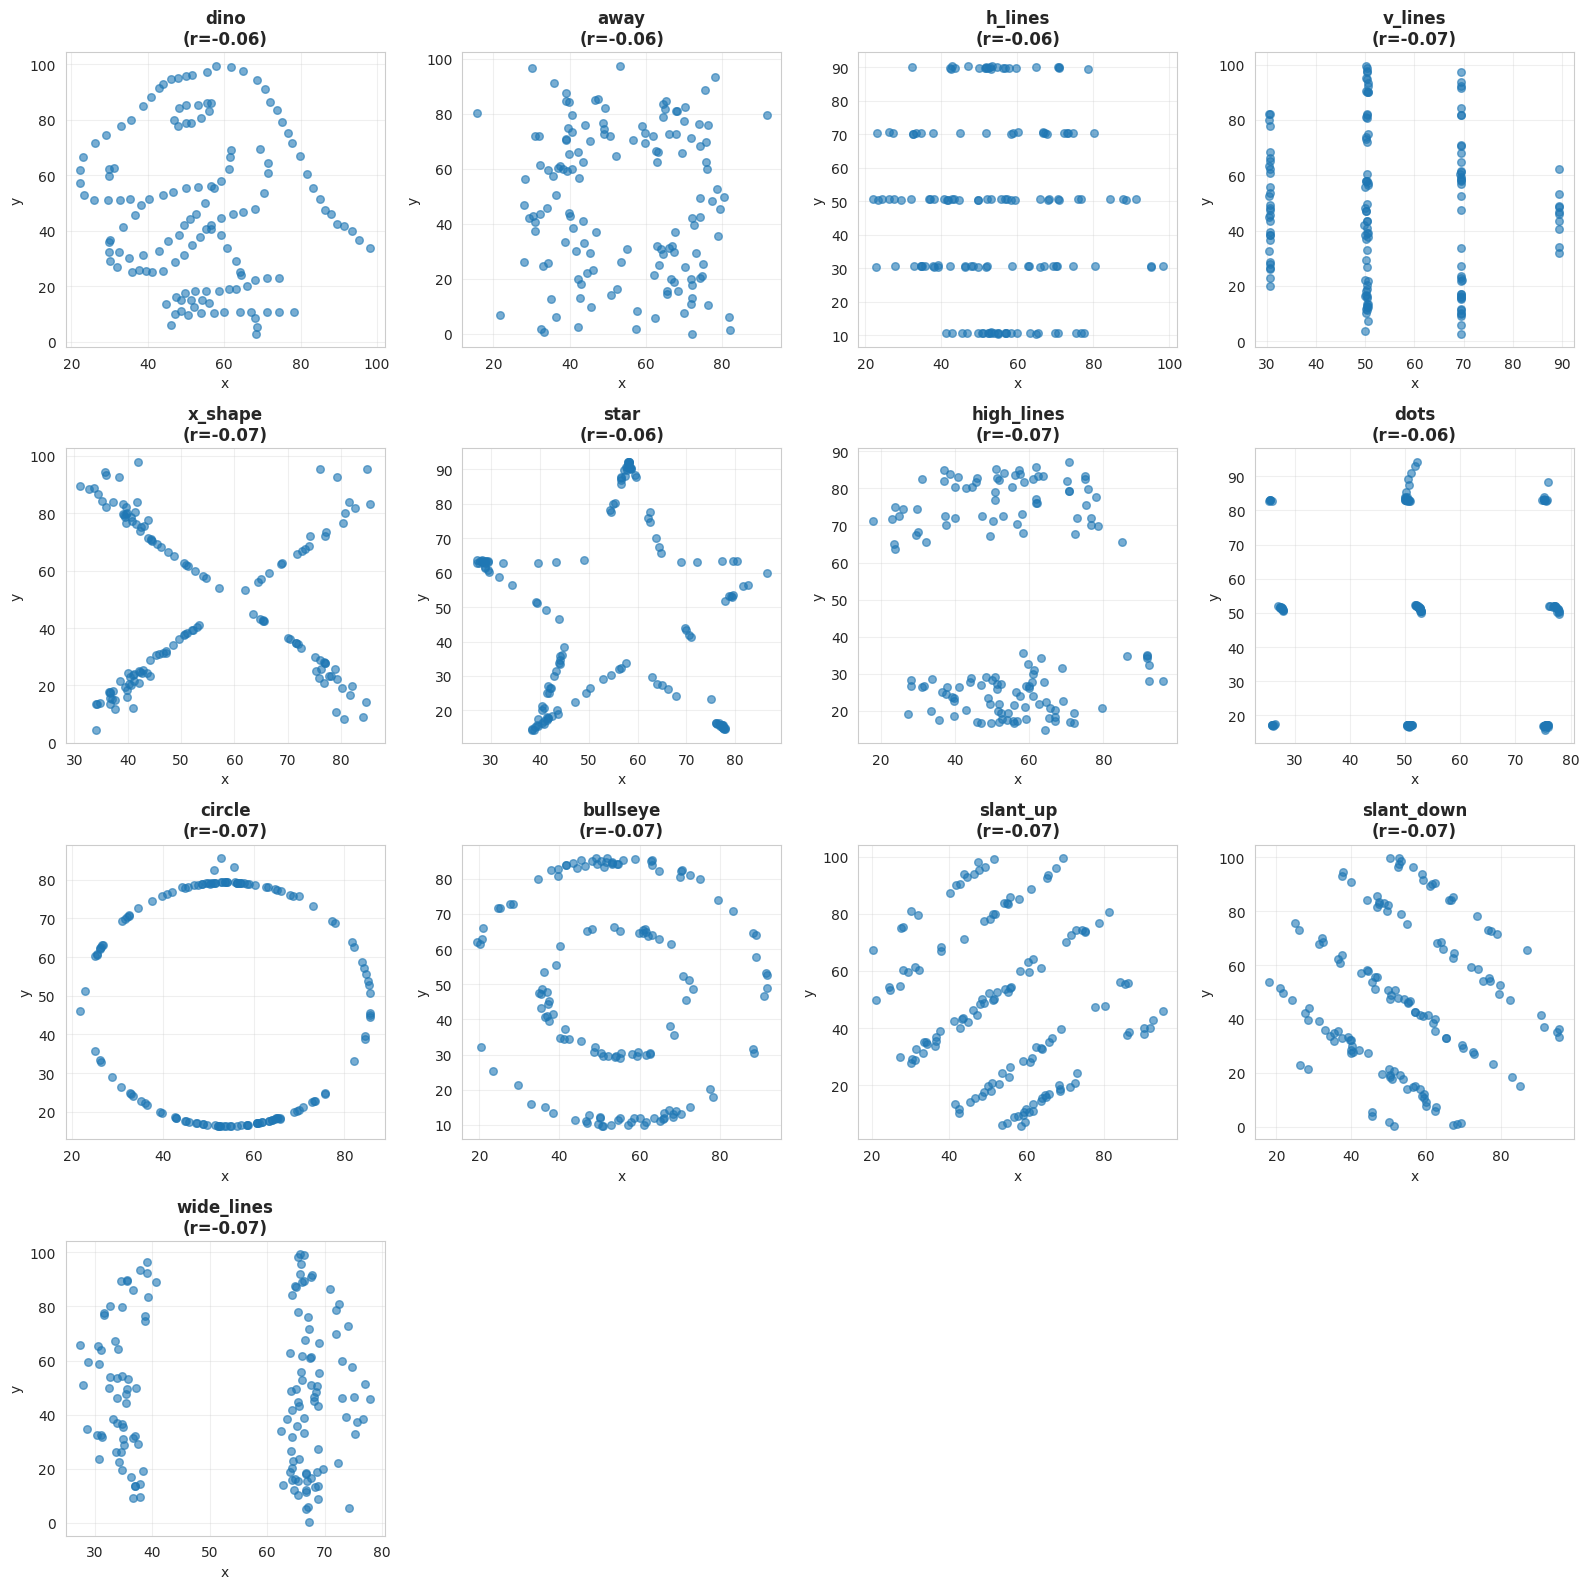

In [6]:
# Pobierzmy unikalne nazwy zestawów
datasets = datasaurus['dataset'].unique()
n_datasets = len(datasets)

# Obliczmy układ siatki
n_cols = 4
n_rows = (n_datasets + n_cols - 1) // n_cols

# Stwórzmy wielką wizualizację
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
axes = axes.flatten() if n_datasets > 1 else [axes]

for idx, dataset_name in enumerate(datasets):
    # Filtruj dane dla tego zestawu
    subset = datasaurus[datasaurus['dataset'] == dataset_name]

    # Rysuj scatter plot
    axes[idx].scatter(subset['x'], subset['y'], alpha=0.6, s=30)
    axes[idx].set_title(f'{dataset_name}\n(r={correlations[dataset_name]:.2f})',
                        fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('y')
    axes[idx].grid(True, alpha=0.3)

# Ukryj puste subploty
for idx in range(n_datasets, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()

# CZĘŚĆ 4: Szczegółowa analiza jednego zestawu (dino)


Statystyki dla zestawu 'dino':
  Średnia x: 54.26
  Średnia y: 47.83
  Odchylenie std x: 16.77
  Odchylenie std y: 26.94
  Korelacja: -0.06


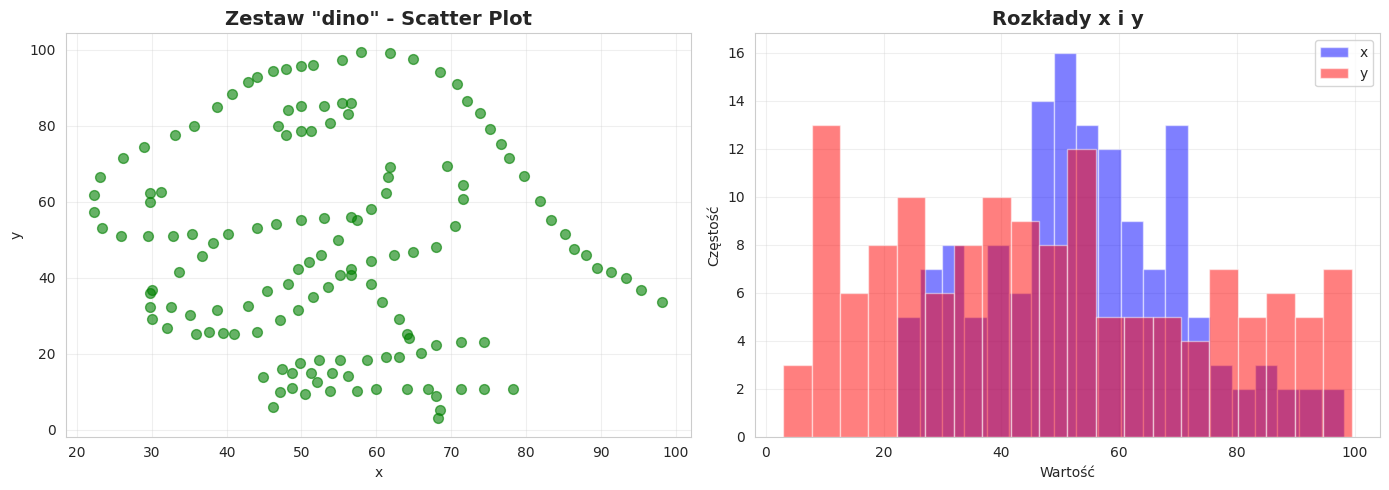

In [7]:
dino = datasaurus[datasaurus['dataset'] == 'dino']

print(f"\nStatystyki dla zestawu 'dino':")
print(f"  Średnia x: {dino['x'].mean():.2f}")
print(f"  Średnia y: {dino['y'].mean():.2f}")
print(f"  Odchylenie std x: {dino['x'].std():.2f}")
print(f"  Odchylenie std y: {dino['y'].std():.2f}")
print(f"  Korelacja: {np.corrcoef(dino['x'], dino['y'])[0,1]:.2f}")


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Wykres rozrzutu
axes[0].scatter(dino['x'], dino['y'], alpha=0.6, s=50, color='green')
axes[0].set_title('Zestaw "dino" - Scatter Plot', fontsize=14, fontweight='bold')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].grid(True, alpha=0.3)

# Histogramy
axes[1].hist(dino['x'], alpha=0.5, label='x', bins=20, color='blue')
axes[1].hist(dino['y'], alpha=0.5, label='y', bins=20, color='red')
axes[1].set_title('Rozkłady x i y', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Wartość')
axes[1].set_ylabel('Częstość')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Podsumowanie

1. STATYSTYKI MOGĄ BYĆ IDENTYCZNE
   
   Wszystkie zestawy mają podobne:
   - Średnie (około 54 dla x, około 47 dla y)
   - Odchylenia standardowe
   - Korelacje (około -0.06)

2. ALE DANE SĄ RÓŻNE!
   Wizualizacja pokazuje kompletnie różne kształty:
   - Dinozaur
   - Gwiazda
   - Okrąg
   - Linie
   - i wiele innych!

3. MORAŁ: **ZAWSZE WIZUALIZUJ SWOJE DANE!**
   
   Samo patrzenie na statystyki może być bardzo mylące.
   
   Dwa zbiory danych mogą mieć identyczne statystyki,
   ale reprezentować kompletnie różne zjawiska.

4. PRAKTYCZNE ZASTOSOWANIE:
   - Przed analizą statystyczną, zrób wykres
   - Sprawdź rozkład danych
   - Szukaj wartości odstających (outliers)
   - Zidentyfikuj wzorce, które statystyki mogą ukryć

**ZADANIE 1: Analiza porównawcza (łatwe)**
--------------------------------------
Wybierz dwa zestawy danych z Datasaurus Dozen i:

a) Oblicz wszystkie statystyki opisowe (w tym kurtozę, IQR, ...)

b) Stwórz wykresy rozkładu x i y.

c) Napisz krótki opis różnic między nimi.



Statystyki dla zestawu 'bullseye':
  Średnia x: 54.27
  Średnia y: 47.83
  Mediana x: 53.84
  Mediana y: 47.38
  Odchylenie std x: 16.77
  Odchylenie std y: 26.94
  IQR x: 23.17
  IQR y: 46.29
  Kurtoza x: -0.19
  Kurtoza y: -1.44
  Korelacja x,y: -0.07


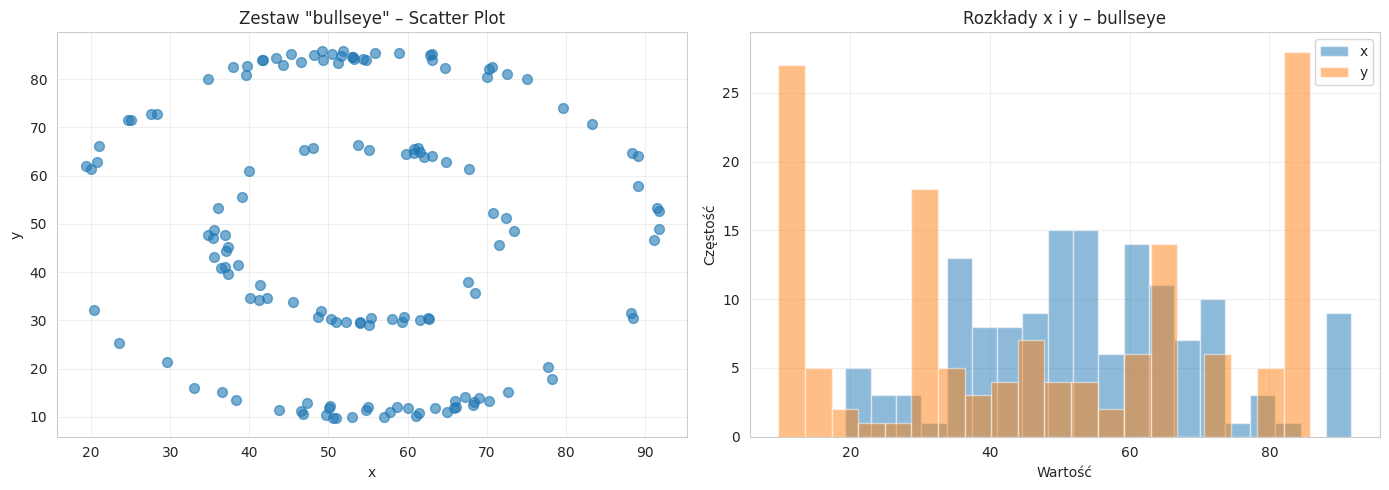


Statystyki dla zestawu 'x_shape':
  Średnia x: 54.26
  Średnia y: 47.84
  Mediana x: 47.14
  Mediana y: 39.88
  Odchylenie std x: 16.77
  Odchylenie std y: 26.93
  IQR x: 31.77
  IQR y: 50.14
  Kurtoza x: -1.36
  Kurtoza y: -1.43
  Korelacja x,y: -0.07


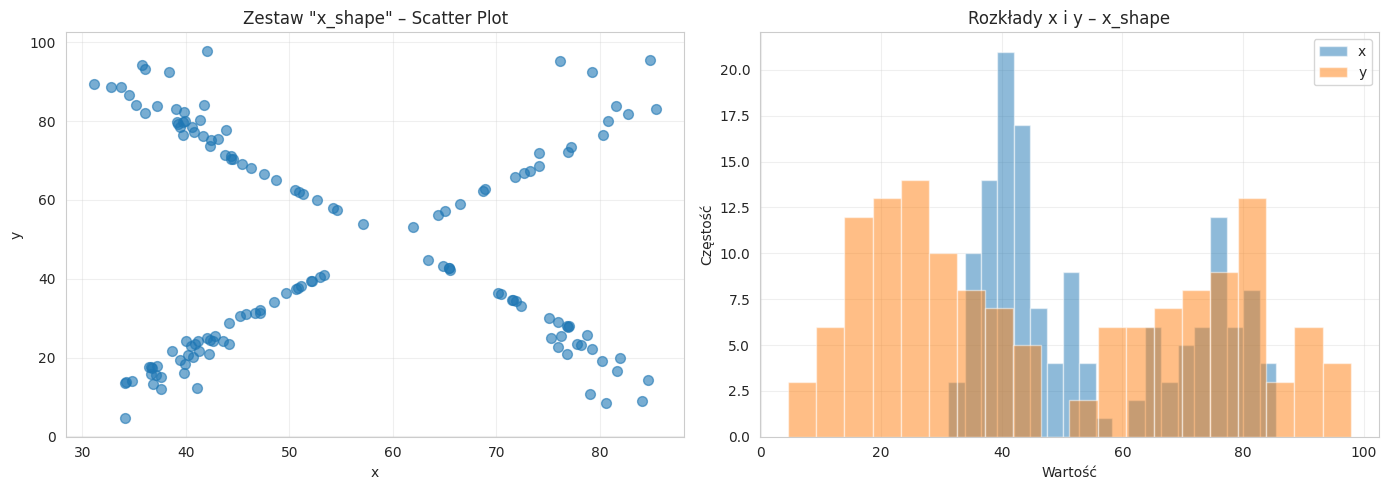

In [11]:

datasets = ["bullseye", "x_shape"]

for name in datasets:
    data = datasaurus[datasaurus["dataset"] == name]

    print(f"\nStatystyki dla zestawu '{name}':")
    print(f"  Średnia x: {data['x'].mean():.2f}")
    print(f"  Średnia y: {data['y'].mean():.2f}")
    print(f"  Mediana x: {data['x'].median():.2f}")
    print(f"  Mediana y: {data['y'].median():.2f}")
    print(f"  Odchylenie std x: {data['x'].std():.2f}")
    print(f"  Odchylenie std y: {data['y'].std():.2f}")
    print(f"  IQR x: {(data['x'].quantile(0.75) - data['x'].quantile(0.25)):.2f}")
    print(f"  IQR y: {(data['y'].quantile(0.75) - data['y'].quantile(0.25)):.2f}")
    print(f"  Kurtoza x: {data['x'].kurtosis():.2f}")
    print(f"  Kurtoza y: {data['y'].kurtosis():.2f}")
    print(f"  Korelacja x,y: {np.corrcoef(data['x'], data['y'])[0,1]:.2f}")

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    axes[0].scatter(data['x'], data['y'], alpha=0.6, s=50)
    axes[0].set_title(f'Zestaw "{name}" – Scatter Plot')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[0].grid(True, alpha=0.3)

    axes[1].hist(data['x'], bins=20, alpha=0.5, label='x')
    axes[1].hist(data['y'], bins=20, alpha=0.5, label='y')
    axes[1].set_title(f'Rozkłady x i y – {name}')
    axes[1].set_xlabel('Wartość')
    axes[1].set_ylabel('Częstość')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


**ZADANIE 2: Stwórz własny przykład (dla ambitnych)**
-------------------------------------------
Spróbuj stworzyć dwa zestawy danych, które mają:
- Podobną średnią
- Podobne odchylenie standardowe
- Ale różne kształty na wykresie